In [1]:
import torch.nn.functional as F
from sentence_transformers import SentenceTransformer
import pandas as pd

c:\Users\majal\Desktop\GP2\Bias-lensGP2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
df = pd.read_csv("Small1000_with_scores.csv")

In [15]:
df.shape

(806, 14)

In [16]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,date_publish,outlet,headline,lead,body,authors,domain,url,political_leaning,newsguard_score,extracted_names
0,0,0,115898626,2017-01-01 00:00:00,ABC_News,"3 Men Decapitated, 2 More Slain in Acapulco Ov...","3 Men Decapitated, 2 More Slain in Acapulco Ov...",At least five people were killed over the New ...,['Abc News'],abcnews.go.com,http://abcnews.go.com/International/wireStory/...,0,95.0,[]
1,1,1,115884354,2017-01-01 00:00:00,ABC_News,Thousands in Hong Kong March for Pro-Democracy...,Thousands in Hong Kong March for Pro-Democracy...,"Nearly 5,000 people in Hong Kong marched in a ...",['Abc News'],abcnews.go.com,http://abcnews.go.com/International/wireStory/...,0,95.0,[]
2,2,2,115880292,2017-01-01 00:00:00,ABC_News,Slovakia Bans Train Patrols by Far-Right Party,Slovakia Bans Train Patrols by Far-Right Party,Train and railway station patrols set up by a ...,['Abc News'],abcnews.go.com,http://abcnews.go.com/International/wireStory/...,0,95.0,[]
3,3,3,115985210,2017-01-01 00:00:00,ABC_News,Suicide Bombers Kill 9 South of Iraq's Capital,Suicide Bombers Kill 9 South of Iraq's Capital,Iraqi officials say a pair of suicide bombers ...,['Abc News'],abcnews.go.com,http://abcnews.go.com/International/wireStory/...,0,95.0,[]
4,4,4,115912220,2017-01-01 00:00:00,ABC_News,Officials: Delaware Man Injured in Istanbul Ni...,Officials: Delaware Man Injured in Istanbul Ni...,The State Department has confirmed that a Dela...,['Abc News'],abcnews.go.com,http://abcnews.go.com/US/wireStory/officials-d...,0,95.0,[]


In [17]:
df["combined_text"] = df["headline"] + " " + df["lead"] + " "+df["body"]

In [18]:
## https://huggingface.co/avsolatorio/GIST-small-Embedding-v0
revision = None  # Replace with the specific revision to ensure reproducibility if the model is updated.

model = SentenceTransformer("avsolatorio/GIST-small-Embedding-v0", revision=revision)

In [19]:
df["text_vectors"] = df["combined_text"].apply(lambda x: model.encode(x))

KeyboardInterrupt: 

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,date_publish,outlet,headline,lead,body,authors,domain,url,political_leaning,newsguard_score,extracted_names,combined_text,text_vectors
0,0,0,115898626,2017-01-01 00:00:00,ABC_News,"3 Men Decapitated, 2 More Slain in Acapulco Ov...","3 Men Decapitated, 2 More Slain in Acapulco Ov...",At least five people were killed over the New ...,['Abc News'],abcnews.go.com,http://abcnews.go.com/International/wireStory/...,0,95.0,[],"3 Men Decapitated, 2 More Slain in Acapulco Ov...","[0.014337818, -0.018631125, 0.030869678, -0.00..."
1,1,1,115884354,2017-01-01 00:00:00,ABC_News,Thousands in Hong Kong March for Pro-Democracy...,Thousands in Hong Kong March for Pro-Democracy...,"Nearly 5,000 people in Hong Kong marched in a ...",['Abc News'],abcnews.go.com,http://abcnews.go.com/International/wireStory/...,0,95.0,[],Thousands in Hong Kong March for Pro-Democracy...,"[-0.06644088, 0.01585136, 0.011816703, -0.0274..."
2,2,2,115880292,2017-01-01 00:00:00,ABC_News,Slovakia Bans Train Patrols by Far-Right Party,Slovakia Bans Train Patrols by Far-Right Party,Train and railway station patrols set up by a ...,['Abc News'],abcnews.go.com,http://abcnews.go.com/International/wireStory/...,0,95.0,[],Slovakia Bans Train Patrols by Far-Right Party...,"[-0.006447068, 0.039524555, -0.007932826, -0.0..."
3,3,3,115985210,2017-01-01 00:00:00,ABC_News,Suicide Bombers Kill 9 South of Iraq's Capital,Suicide Bombers Kill 9 South of Iraq's Capital,Iraqi officials say a pair of suicide bombers ...,['Abc News'],abcnews.go.com,http://abcnews.go.com/International/wireStory/...,0,95.0,[],Suicide Bombers Kill 9 South of Iraq's Capital...,"[0.011026992, 0.015652608, -0.04421485, -0.022..."
4,4,4,115912220,2017-01-01 00:00:00,ABC_News,Officials: Delaware Man Injured in Istanbul Ni...,Officials: Delaware Man Injured in Istanbul Ni...,The State Department has confirmed that a Dela...,['Abc News'],abcnews.go.com,http://abcnews.go.com/US/wireStory/officials-d...,0,95.0,[],Officials: Delaware Man Injured in Istanbul Ni...,"[-0.016417947, 0.008195108, 0.02811521, -0.054..."


In [13]:
df[["id","text_vectors", "political_leaning"]].to_csv("text_vectors.csv")

In [7]:
df2 = pd.read_csv("text_vectors.csv")
df2.shape

(806, 4)

In [6]:
df_nodes = pd.read_csv("node_embeddings.csv")

In [10]:
df_nodes['id1'] = df_nodes["nodeLabel"].apply(eval)
df_nodes['id'] = df_nodes["id1"].apply(lambda x:x[0])
df_nodes.head()

,Unnamed: 0,nodeLabel,embeddingVector,id,id1
0,0,[52898231],"[0.0035458847414702177, 0.0057817851193249226,...",52898231,[52898231]
1,1,[3239377],"[0.0035500838421285152, -0.002165608573704958,...",3239377,[3239377]
2,2,[52923954],"[0.003548684064298868, 0.0004835226573050022, ...",52923954,[52923954]
3,3,[79068614],"[0.0035864762030541897, 0.007081980817019939, ...",79068614,[79068614]
4,5,[79069943],"[0.003589275758713484, 0.001783718355000019, 0...",79069943,[79069943]


In [16]:
df_nodes.drop(columns=["nodeLabel", "Unnamed: 0", 'id1'], inplace=True)

In [19]:
df_nodes

,embeddingVector,id
0,"[0.0035458847414702177, 0.0057817851193249226,...",52898231
1,"[0.0035500838421285152, -0.002165608573704958,...",3239377
2,"[0.003548684064298868, 0.0004835226573050022, ...",52923954
3,"[0.0035864762030541897, 0.007081980817019939, ...",79068614
4,"[0.003589275758713484, 0.001783718355000019, 0...",79069943
...,...,...
801,"[0.001482714549638331, 0.004351161886006594, 0...",3169220
802,"[0.0014757162425667048, 0.001971817808225751, ...",115972660
803,"[0.001474316231906414, 0.004620949272066355, -...",52987565
804,"[0.0014785154489800334, -0.0033264444209635258...",4487946


In [20]:
df3 = df_nodes.merge(df2[['id', 'text_vectors', 'political_leaning']], on= 'id')

In [22]:
df3.to_csv("node_text_embeddings.csv")

In [2]:
df_embeddings = pd.read_csv("node_text_embeddings.csv")

In [3]:
df_embeddings.head()

,Unnamed: 0,embeddingVector,id,text_vectors,political_leaning
0,0,"[0.0035458847414702177, 0.0057817851193249226,...",52898231,[-0.03461906 0.03441137 -0.02845796 -0.030412...,1
1,1,"[0.0035500838421285152, -0.002165608573704958,...",3239377,[-1.17352558e-02 3.63212936e-02 -7.73911085e-...,0
2,2,"[0.003548684064298868, 0.0004835226573050022, ...",52923954,[ 7.41601037e-03 1.80580188e-02 -9.67473071e-...,1
3,3,"[0.0035864762030541897, 0.007081980817019939, ...",79068614,[-0.03248248 0.03960977 0.04244677 -0.025196...,3
4,4,"[0.003589275758713484, 0.001783718355000019, 0...",79069943,[-8.01296830e-02 2.70859562e-02 -1.30568352e-...,3


In [4]:
import numpy as np

In [5]:
df_embeddings["embeddingVector"] = df_embeddings["embeddingVector"].apply(eval)
df_embeddings["text_vectors"] = df_embeddings["text_vectors"].apply(lambda x: np.fromstring(x.strip('[]'), sep = ' '))

In [26]:
final_list = []
for i, r in df_embeddings.iterrows():
    ans = np.concatenate([r["embeddingVector"], r["text_vectors"]])
    final_list.append(ans)

In [27]:
final_df = pd.DataFrame(final_list)
# final_df = pd.DataFrame(df_embeddings["text_vectors"].tolist())


In [28]:
final_df["label"] = df_embeddings["political_leaning"]

In [29]:
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,label
0,0.003546,0.005782,-0.003112,0.003954,-0.003797,0.001776,-0.001275,0.007202,0.006871,0.003965,...,-0.014324,-0.034225,0.035101,0.001452,-0.000742,-0.026761,-0.112526,-0.023985,0.046370,1
1,0.003550,-0.002166,0.001405,-0.001466,-0.005525,0.001484,0.002857,-0.006315,0.003683,0.004160,...,-0.103092,-0.020565,-0.016281,-0.038384,0.055739,0.013527,-0.000829,0.035034,0.057270,0
2,0.003549,0.000484,-0.005309,-0.004868,0.000259,-0.003627,-0.003729,-0.007018,0.004746,0.004095,...,-0.131135,-0.006244,0.007249,0.009222,-0.001193,0.043150,-0.022127,-0.019655,0.045448,1
3,0.003586,0.007082,0.004097,-0.006767,0.000327,-0.006256,0.002210,-0.003668,0.007303,0.005853,...,-0.049254,-0.027563,-0.033110,-0.005742,-0.052620,-0.042160,-0.055521,0.031746,0.020767,3
4,0.003589,0.001784,0.001900,0.000037,0.004383,0.003966,-0.000244,-0.002263,0.005177,0.005983,...,0.026949,0.034450,-0.015511,-0.016754,-0.039646,-0.046505,-0.072758,0.011584,0.074044,3


In [30]:
final_df.to_csv("Node_text_viz.tsv", sep='\t')

In [12]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
X = final_df.drop(columns=['label'])
y = final_df["label"]

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=.6)

In [86]:


# model = LogisticRegression()
# model= RandomForestClassifier()
model = SVC(C=1,kernel="rbf",gamma="scale")
model.fit(X_train, y_train)

preds = model.predict(X_test)


print(accuracy_score(y_test, preds))


0.4931129476584022


In [25]:

# Create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the neural network architecture
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

accuracy


Epoch 1/100


c:\Users\majal\Desktop\GP2\Bias-lensGP2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 - 3s - 281ms/step - accuracy: 0.3268 - loss: 1.3609 - val_accuracy: 0.4615 - val_loss: 1.4011
Epoch 2/100
9/9 - 0s - 11ms/step - accuracy: 0.4086 - loss: 1.2840 - val_accuracy: 0.4615 - val_loss: 1.4381
Epoch 3/100
9/9 - 0s - 11ms/step - accuracy: 0.4241 - loss: 1.2247 - val_accuracy: 0.4615 - val_loss: 1.5012
Epoch 4/100
9/9 - 0s - 11ms/step - accuracy: 0.4241 - loss: 1.2808 - val_accuracy: 0.4615 - val_loss: 1.5099
Epoch 5/100
9/9 - 0s - 12ms/step - accuracy: 0.4241 - loss: 1.3896 - val_accuracy: 0.4615 - val_loss: 1.4734
Epoch 6/100
9/9 - 0s - 11ms/step - accuracy: 0.4241 - loss: 1.2439 - val_accuracy: 0.4615 - val_loss: 1.4507
Epoch 7/100
9/9 - 0s - 12ms/step - accuracy: 0.4241 - loss: 1.2417 - val_accuracy: 0.4615 - val_loss: 1.4825
Epoch 8/100
9/9 - 0s - 12ms/step - accuracy: 0.4202 - loss: 1.2997 - val_accuracy: 0.4615 - val_loss: 1.5003
Epoch 9/100
9/9 - 0s - 12ms/step - accuracy: 0.4358 - loss: 1.2010 - val_accuracy: 0.4615 - val_loss: 1.4515
Epoch 10/100
9/9 - 0s - 14ms/s

0.4834710657596588

In [95]:
import matplotlib.pyplot as plt
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

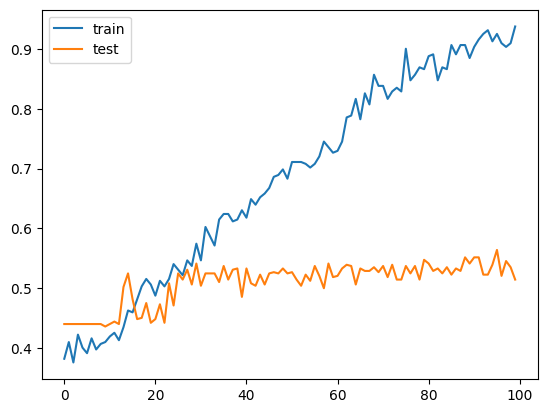

In [105]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(['train', 'test'], loc='upper left')